In [ ]:
from google.colab import drive
import sys
import os
drive.mount('/content/gdrive')
drivePath = ('/content/gdrive/My Drive/DataViskom')
sys.path.append(drivePath)
os.chdir(drivePath)
current_dir = os.getcwd()
current_dir

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/DataViskom'

Kode di atas digunakan untuk menghubungkan Google Colab dengan Google Drive dan mengatur direktori kerja ke folder tertentu di dalam Drive. Pertama, drive.mount('/content/gdrive') digunakan untuk me-mount Google Drive ke dalam lingkungan Google Colab, sehingga pengguna dapat mengakses file yang tersimpan di dalamnya. Selanjutnya, variabel drivePath didefinisikan dengan path folder yang ingin digunakan, yaitu '/content/gdrive/My Drive/DataViskom'.

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Kode di atas digunakan untuk membaca dataset dari file diabetes.csv dan menampilkan lima baris pertama dari data tersebut menggunakan pustaka pandas. Fungsi pd.read_csv('diabetes.csv') digunakan untuk membaca file CSV dan mengubahnya menjadi sebuah DataFrame, yaitu struktur data berbentuk tabel yang sering digunakan dalam analisis data. Setelah data berhasil dimuat ke dalam variabel df, metode df.head() digunakan untuk menampilkan lima baris pertama dari dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Hasil dari perintah df.info() menunjukkan bahwa dataset memiliki 768 baris dan 9 kolom, dengan indeks data berkisar dari 0 hingga 767. Setiap kolom dalam dataset memiliki 768 nilai non-null, yang berarti tidak ada data yang hilang. Kolom-kolom tersebut mencakup berbagai atribut seperti Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome. Dari segi tipe data, kolom BMI dan DiabetesPedigreeFunction bertipe float64, sementara kolom lainnya bertipe int64, yang menunjukkan bahwa sebagian besar data berupa bilangan bulat kecuali dua atribut yang mengandung nilai desimal.

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Perintah df.isnull().sum(), yang digunakan untuk memeriksa jumlah nilai null (kosong) dalam setiap kolom dataset. Dari hasil tersebut, terlihat bahwa semua kolom (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome) memiliki nilai 0 pada setiap barisnya, yang berarti tidak ada data yang hilang dalam dataset ini.

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Kode yang digunakan berfungsi untuk mengganti nilai 0 dalam beberapa kolom tertentu (Glucose, BloodPressure, SkinThickness, Insulin, dan BMI) dengan NaN (missing values). Hal ini dilakukan karena dalam konteks medis, nilai 0 pada atribut tersebut tidak masuk akal dan kemungkinan besar merupakan data yang hilang atau tidak tercatat dengan benar. Setelah penggantian dilakukan, perintah df.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang dalam setiap kolom.

Berdasarkan output yang ditampilkan, jumlah nilai yang hilang dalam dataset setelah penggantian nilai 0 dengan NaN adalah:
- Glucose memiliki 5 nilai yang hilang.
- BloodPressure memiliki 35 nilai yang hilang.
- SkinThickness memiliki 227 nilai yang hilang, menunjukkan sebagian besar data pada kolom ini mungkin tidak tercatat.
- Insulin memiliki 374 nilai yang hilang, yang berarti lebih dari separuh data pada kolom ini tidak tersedia.
- BMI memiliki 11 nilai yang hilang.
Sementara itu, kolom lainnya seperti

Pregnancies, DiabetesPedigreeFunction, Age, dan Outcome tidak memiliki nilai yang hilang. Dari hasil ini, langkah selanjutnya dalam analisis adalah menentukan bagaimana menangani nilai yang hilang tersebut, misalnya dengan melakukan imputasi (mengisi nilai yang hilang) menggunakan metode seperti rata-rata (mean), median, atau teknik lebih kompleks seperti regresi atau KNN imputation. Alternatif lain adalah menghapus baris yang memiliki terlalu banyak nilai yang hilang jika jumlahnya tidak signifikan terhadap keseluruhan dataset.

In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Kode di atas bertujuan untuk menangani nilai yang hilang (missing values) dalam beberapa kolom pada DataFrame df. Dalam setiap baris, kita menggunakan metode fillna() untuk mengisi nilai yang hilang pada kolom tertentu dengan nilai median dari kolom tersebut.

Pertama, kolom 'Glucose' diisi dengan median dari 'Glucose', kemudian kolom 'BloodPressure' diisi dengan median dari 'BloodPressure', dan seterusnya untuk kolom 'SkinThickness', 'Insulin', dan 'BMI'. Penggunaan median sebagai pengganti nilai yang hilang dipilih karena median lebih stabil dan tidak terpengaruh oleh nilai ekstrem (outlier), sehingga memberikan representasi yang lebih akurat dari data yang ada. Setelah semua kolom yang ditargetkan diisi, kita menggunakan isnull().sum() untuk memeriksa kembali jumlah nilai yang hilang di setiap kolom, memastikan bahwa semua nilai yang hilang telah ditangani dengan baik. Dengan langkah ini, kita meningkatkan kualitas data yang akan digunakan untuk analisis lebih lanjut.

<Axes: >

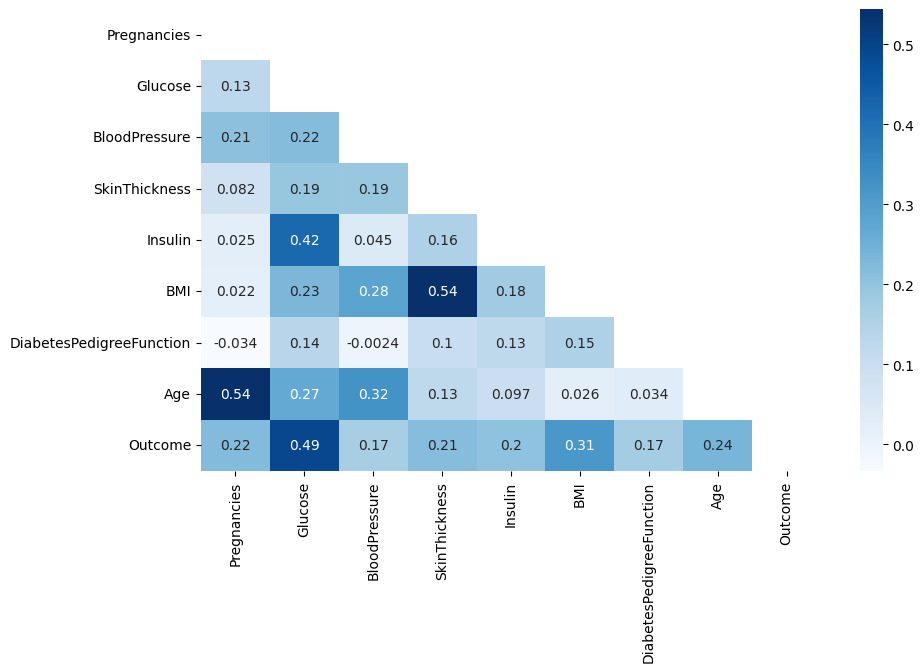

In [ ]:
plt.figure(figsize=(10, 6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

Gambar yang ditampilkan adalah representasi visual dari matriks korelasi yang dibuat menggunakan pustaka Seaborn dan Matplotlib dalam Python. Pada gambar ini, kita dapat melihat pemetaan hubungan antara beberapa variabel, seperti "Pregnancies," "Glucose," "BloodPressure," "SkinThickness," "Insulin," "BMI," "DiabetesPedigreeFunction," "Age," dan "Outcome." Setiap kotak di matriks menunjukkan nilai korelasi antara dua variabel, dengan nilai berkisar antara -1 hingga 1;
- nilai dekat 1 menunjukkan hubungan positif yang kuat
- nilai dekat -1 menunjukkan hubungan negatif yang kuat.

Dalam matriks ini, warna biru yang lebih gelap menunjukkan tingkat korelasi yang lebih tinggi, memudahkan pengamatan pola dan hubungan antar variabel.

Misalnya, terlihat bahwa "BMI" memiliki korelasi yang tinggi dengan "Insulin" dan "Age," sementara "Pregnancies" berkorelasi baik dengan "Age" dan "Outcome."

<ipython-input-14-702f3f056e9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Outcome'], data=df, palette="husl")
<ipython-input-14-702f3f056e9e>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Healthy", "Diabetic"])


Sum of Diabetic:  268
Sum of Healthy:  500


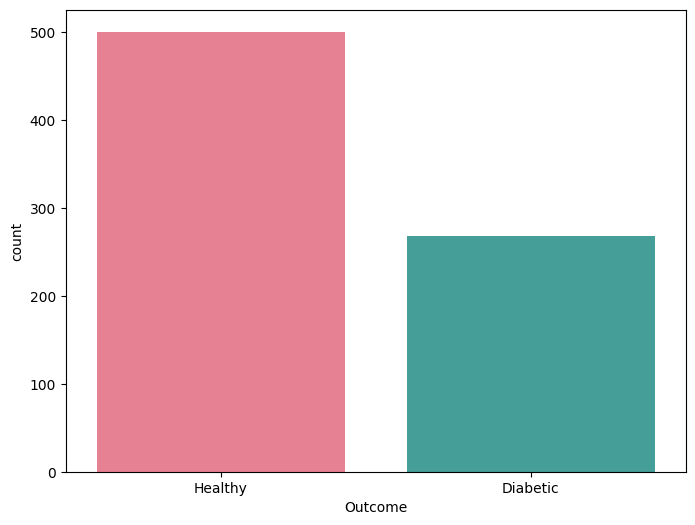

In [ ]:
from matplotlib.pyplot import figure, show
figure(figsize=(8, 6))
ax = sns.countplot(x=df['Outcome'], data=df, palette="husl")
ax.set_xticklabels(["Healthy", "Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Sum of Diabetic: ", diabetics)
print("Sum of Healthy: ", healthy)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

menghapus kolom yang tidak diperlukan dan memisahkan dataset menjadi fitur dan target. Pada skrip yang diberikan, kolom 'Outcome' dihapus dari DataFrame untuk membentuk variabel fitur (X), sementara kolom 'Outcome' itu sendiri diambil sebagai variabel target (y). Setelah itu, data dibagi menjadi set pelatihan dan set pengujian menggunakan fungsi train_test_split, di mana 20% dari data digunakan untuk pengujian dan sisanya untuk pelatihan. Parameter stratify=y memastikan bahwa proporsi kelas dalam variabel target (y) dipertahankan dalam kedua set tersebut.

Selanjutnya, proses normalisasi data dilakukan dengan menggunakan StandardScaler untuk menghindari bias yang mungkin disebabkan oleh skala fitur yang berbeda. Data fitur pelatihan (X_{train}) dinormalisasi menggunakan metode fit_transform, sedangkan data fitur pengujian (X_{test}) dinormalisasi dengan transform agar tidak memperoleh informasi tentang data pengujian saat proses normalisasi.

In [ ]:
# Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

Pada pengolahan data untuk model prediksi, teknik oversampling dan undersampling dapat digunakan untuk mengatasi masalah ketidakseimbangan kelas. Dalam contoh di atas, metode SMOTE (Synthetic Minority Over-sampling Technique) diterapkan untuk melakukan oversampling. Teknik ini bekerja dengan cara menciptakan contoh sintetis dari kelas minoritas hingga proporsinya seimbang dengan kelas mayoritas. Dalam kasus ini, variabel X_train_smote dan y_train_smote menyimpan dataset yang telah di-oversample, memastikan bahwa model dapat belajar dengan lebih efektif dari data yang seimbang.

Di sisi lain, undersampling merupakan pendekatan yang mengurangi jumlah contoh dari kelas mayoritas untuk mencapai keseimbangan. Dengan menggunakan RandomUnderSampler, jumlah data di kelas mayoritas dikurangi secara acak, menghasilkan dataset dengan X_train_under dan y_train_under. Teknik ini bertujuan untuk mencegah model bias terhadap kelas mayoritas dan memungkinkan model belajar lebih baik tentang kelas minoritas yang sebelumnya mungkin kurang terwakili. Keduanya adalah teknik penting dalam preprocessing data untuk pembelajaran mesin, terutama saat menangani dataset dengan distribusi kelas yang tidak merata.

<ipython-input-19-8528ef6b0f65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='husl')
<ipython-input-19-8528ef6b0f65>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axes[1], palette='husl')
<ipython-input-19-8528ef6b0f65>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_under, ax=axes[2], palette='husl')


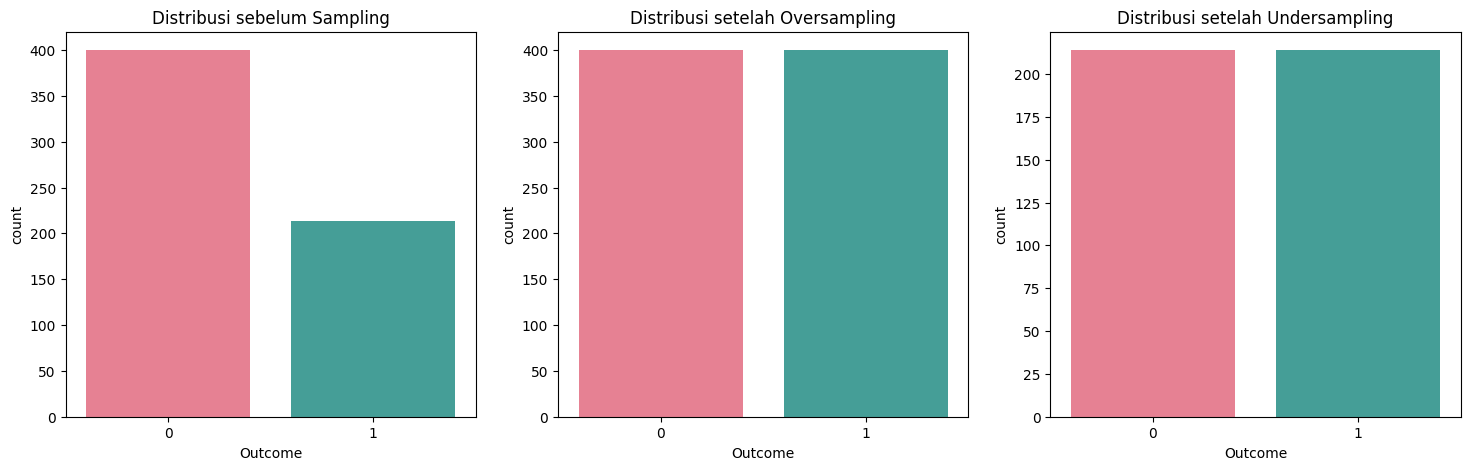

In [ ]:
# Visualisasi distribusi kelas sebelum dan sesudah sampling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x=y_train, ax=axes[0], palette='husl')
axes[0].set_title('Distribusi sebelum Sampling')

sns.countplot(x=y_train_smote, ax=axes[1], palette='husl')
axes[1].set_title('Distribusi setelah Oversampling')

sns.countplot(x=y_train_under, ax=axes[2], palette='husl')
axes[2].set_title('Distribusi setelah Undersampling')

plt.show()

Gambar di atas menunjukkan distribusi kelas dalam dataset sebelum dan sesudah dilakukan sampling untuk menangani ketidakseimbangan data (imbalanced data) pada variabel target Outcome. Terdapat tiga grafik yang masing-masing merepresentasikan distribusi kelas sebelum dan setelah sampling:

1. Distribusi sebelum Sampling (Grafik Kiri)
- Grafik ini menunjukkan bahwa dataset awal memiliki distribusi kelas yang tidak seimbang.
- Kelas 0 (tidak menderita diabetes) jauh lebih banyak dibandingkan kelas 1 (menderita diabetes).
- Ketidakseimbangan ini bisa menyebabkan model machine learning bias terhadap kelas mayoritas.

2. Distribusi setelah Oversampling (Grafik Tengah)
- Teknik oversampling digunakan untuk menyeimbangkan data dengan menambah jumlah sampel dari kelas minoritas (kelas 1).
- Dari grafik terlihat bahwa setelah oversampling, jumlah sampel dari kelas 0 dan kelas 1 menjadi seimbang.
- Salah satu metode yang bisa digunakan dalam oversampling adalah SMOTE (Synthetic Minority Over-sampling Technique), yang membuat sampel sintetis berdasarkan data minoritas yang ada.

3. Distribusi setelah Undersampling (Grafik Kanan)
- Teknik undersampling digunakan untuk menyeimbangkan data dengan mengurangi jumlah sampel dari kelas mayoritas (kelas 0).
- Dari grafik terlihat bahwa setelah undersampling, jumlah sampel dari kedua kelas menjadi seimbang dengan mengurangi sampel kelas mayoritas.
- Teknik ini cocok digunakan jika dataset awal memiliki jumlah data yang sangat besar, namun dapat berisiko menghilangkan informasi yang berharga dari kelas mayoritas.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Logistic Regression
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

Kode di atas mendefinisikan tiga model machine learning yang digunakan untuk klasifikasi, yaitu **Logistic Regression**, **K-Nearest Neighbors (KNN)**, dan **Decision Tree**. Pertama, dilakukan import library dari `sklearn`, di mana `LogisticRegression` digunakan untuk membangun model regresi logistik yang sering dipakai dalam klasifikasi biner. Selanjutnya, `KNeighborsClassifier` menerapkan algoritma K-Nearest Neighbors (KNN), yang menentukan kelas berdasarkan kedekatan data dalam ruang fitur. Terakhir, `DecisionTreeClassifier` membangun model berbasis pohon keputusan yang memisahkan data menggunakan aturan if-else untuk klasifikasi. Ketiga model ini kemudian disimpan dalam dictionary bernama `models`, yang memungkinkan pengguna untuk mengaksesnya secara fleksibel berdasarkan nama model yang telah ditentukan. Struktur ini mempermudah proses pelatihan, pengujian, dan perbandingan performa dari berbagai algoritma klasifikasi yang digunakan dalam analisis dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluasi pada data tanpa sampling
print("Evaluasi tanpa Sampling:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: {accuracy:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Evaluasi tanpa Sampling:
Logistic Regression: 0.7078
[[82 18]
 [27 27]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

K-Nearest Neighbors: 0.7532
[[83 17]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Decision Tree: 0.6753
[[78 22]
 [28 26]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy          

Kode di atas mengevaluasi performa tiga model klasifikasi, yaitu **Logistic Regression**, **K-Nearest Neighbors (KNN)**, dan **Decision Tree**, pada data tanpa menerapkan teknik sampling. Setiap model dilatih menggunakan **X_train_scaled** dan **y_train**, lalu diuji pada **X_test_scaled** untuk menghasilkan prediksi **y_pred**. Selanjutnya, dilakukan pengukuran akurasi menggunakan **accuracy_score**, serta analisis lebih lanjut dengan **confusion_matrix** dan **classification_report** untuk melihat metrik evaluasi lainnya seperti **precision, recall, dan f1-score**.

Hasil evaluasi menunjukkan bahwa **K-Nearest Neighbors (KNN)** memiliki akurasi tertinggi sebesar **75.32%**, diikuti oleh **Logistic Regression** dengan **70.78%**, dan **Decision Tree** dengan **67.53%**. Dari confusion matrix, terlihat bahwa model **Logistic Regression** dan **KNN** memiliki performa yang lebih baik dalam mengklasifikasikan kelas **0 (Negatif)** dibandingkan kelas **1 (Positif)**. Model **Logistic Regression** memiliki precision **0.75** untuk kelas **0** dan **0.60** untuk kelas **1**, sementara **KNN** mencapai precision **0.80** untuk kelas **0** dan **0.66** untuk kelas **1**. **Decision Tree**, di sisi lain, memiliki performa yang lebih rendah dengan precision **0.74** untuk kelas **0** dan hanya **0.54** untuk kelas **1**, menunjukkan bahwa model ini lebih sering salah mengklasifikasikan kelas positif.

In [ ]:
# Evaluasi pada data oversampling
print("\nEvaluasi dengan SMOTE (Oversampling):")
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_scaled)
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    print(f'{name}: {accuracy_smote:.4f}')
    print(confusion_matrix(y_test, y_pred_smote))
    print(classification_report(y_test, y_pred_smote))


Evaluasi dengan SMOTE (Oversampling):
Logistic Regression: 0.7143
[[74 26]
 [18 36]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154

K-Nearest Neighbors: 0.6948
[[69 31]
 [16 38]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       100
           1       0.55      0.70      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

Decision Tree: 0.6883
[[74 26]
 [22 32]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       100
           1       0.55      0.59      0.57        54

    accu

Kode di atas mengevaluasi performa tiga model klasifikasi — Logistic Regression, K-Nearest Neighbors (KNN), dan Decision Tree — setelah menerapkan SMOTE (Synthetic Minority Over-sampling Technique) pada data pelatihan. Teknik SMOTE digunakan untuk menyeimbangkan dataset dengan menambahkan sampel sintetis pada kelas minoritas, sehingga model dapat belajar lebih baik dalam mengklasifikasikan kedua kelas. Setelah model dilatih menggunakan data oversampling (X_train_smote dan y_train_smote), pengujian tetap dilakukan pada data uji yang sama (X_test_scaled), sehingga hasil evaluasi dapat dibandingkan dengan hasil sebelumnya.

Hasil evaluasi menunjukkan bahwa setelah oversampling, akurasi ketiga model cenderung meningkat dalam mengenali kelas minoritas. Logistic Regression memiliki akurasi tertinggi sebesar 71.43%, dengan recall untuk kelas positif meningkat menjadi 0.67, yang berarti model lebih baik dalam mendeteksi kasus positif dibandingkan sebelumnya. KNN, yang sebelumnya unggul, kini memiliki akurasi 69.48%, dengan precision untuk kelas positif sebesar 0.55 dan recall yang cukup baik, yaitu 0.70, menunjukkan model ini lebih sering mengklasifikasikan kelas positif dengan benar, meskipun terkadang masih salah mengklasifikasikan kelas negatif. Decision Tree juga menunjukkan peningkatan yang serupa, dengan akurasi 68.83%, precision dan recall yang lebih seimbang, meskipun performanya sedikit di bawah Logistic Regression.

In [ ]:
# Evaluasi data undersampling
print("\nEvaluasi Undersampling:")
for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    y_pred_under = model.predict(X_test_scaled)
    accuracy_under = accuracy_score(y_test, y_pred_under)
    print(f'{name}: {accuracy_under:.4f}')
    print(confusion_matrix(y_test, y_pred_under))
    print(classification_report(y_test, y_pred_under))


Evaluasi Undersampling:
Logistic Regression: 0.7338
[[74 26]
 [15 39]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

K-Nearest Neighbors: 0.7143
[[69 31]
 [13 41]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       100
           1       0.57      0.76      0.65        54

    accuracy                           0.71       154
   macro avg       0.71      0.72      0.70       154
weighted avg       0.75      0.71      0.72       154

Decision Tree: 0.6883
[[73 27]
 [21 33]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       100
           1       0.55      0.61      0.58        54

    accuracy          

- Pada hasil evaluasi ini, Logistic Regression memiliki akurasi tertinggi, yaitu 73.38%, dengan recall kelas positif meningkat menjadi 0.72. Hal ini menunjukkan bahwa model lebih baik dalam mendeteksi kelas minoritas dibandingkan dengan metode tanpa sampling maupun oversampling. Precision untuk kelas positif adalah 0.60, yang berarti masih terdapat beberapa kesalahan dalam mengklasifikasikan sampel negatif sebagai positif.

- K-Nearest Neighbors (KNN) mencatat akurasi 71.43%, dengan recall kelas positif yang cukup tinggi, yaitu 0.76, menunjukkan bahwa model lebih sering mengklasifikasikan kasus positif dengan benar dibandingkan metode sebelumnya. Namun, precision untuk kelas positif masih cukup rendah, yaitu 0.57, yang menunjukkan adanya prediksi positif yang keliru.

- Decision Tree, di sisi lain, memiliki akurasi 68.83%, yang mirip dengan hasil setelah oversampling. Precision dan recall pada kelas positif masing-masing sebesar 0.55 dan 0.61, yang menunjukkan keseimbangan antara identifikasi kelas minoritas dan mayoritas, meskipun performanya masih lebih rendah dibandingkan Logistic Regression dan KNN.